# Загрузка датасета

In [1]:
import pandas as pd
import numpy as np

from tqdm import tqdm
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Dataset Description  
Описание данных  
Данные состоят из 3 файлов:  

products.csv - товары с их харакретистиками  
transactions.csv - транзакции покупателей  
sample_submission.csv - пример файла, для понимания формата данных ответов  


**products.csv**  
product_id - уникальный идентификатор товара  
product_name - название товара  
aisle_id - уникальный идентификатор подкатегории  
department_id - уникальный идентификатор категории  
aisle - название подкатегории  
department - название категории  


**transactions.csv**  
order_id - уникальный идентификатор транзакции  
user_id - уникальный идентификатор покупателя  
order_number - номер транзакции в истории покупок данного пользователя  
order_dow - день недели транзакции  
order_hour_of_day - час совершения транзакции  
days_since_prior_order - количество дней с совершения предыдущей транзакции данным пользователем  
product_id - уникальный идентификатор товара  
add_to_cart_order - номер под которым данный товар был добавлен в корзину  
reordered - был ли товар "перезаказан"  


**sample_submission.csv**  
user_id - уникальный идентификатор покупателя  
product_id - идентификаторы товаров через пробел в порядке убывания "уверенности модели"

In [2]:
file_path = '/content/drive/My Drive/Colab Notebooks/skillbox/курсовые/RecSys/products.csv'
data_products = pd.read_csv(file_path)
print(data_products.shape)
data_products.head()

(49688, 6)


,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,2,All-Seasons Salt,104,13,spices seasonings,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry


In [3]:
file_path = '/content/drive/My Drive/Colab Notebooks/skillbox/курсовые/RecSys/transactions.csv'
data_transactions = pd.read_csv(file_path)
print(data_transactions.shape)
data_transactions.head()

(26408073, 9)


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,1,2,8,NaN,196,1.0,0.0
1,2539329,1,1,2,8,NaN,14084,2.0,0.0
2,2539329,1,1,2,8,NaN,12427,3.0,0.0
3,2539329,1,1,2,8,NaN,26088,4.0,0.0
4,2539329,1,1,2,8,NaN,26405,5.0,0.0


<Axes: >

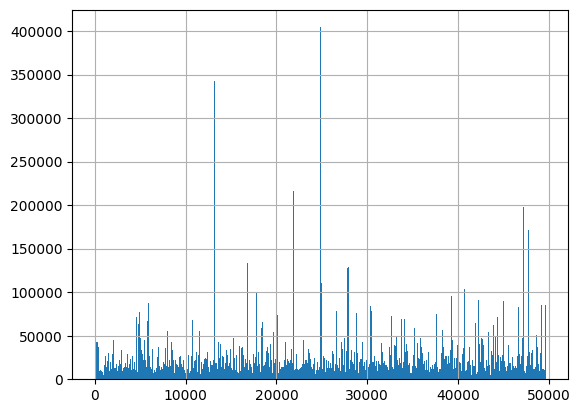

In [4]:
data_transactions.product_id.hist(bins=1000)

In [5]:
data_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26408073 entries, 0 to 26408072
Data columns (total 9 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       float64
 8   reordered               float64
dtypes: float64(3), int64(6)
memory usage: 1.8 GB


In [6]:
# объединение по product_id
data_merge = data_transactions.merge(data_products, left_on='product_id', right_on='product_id')
data_merge.shape

(26408073, 14)

In [7]:
# группировка по user_id и product_id и сортировка по кол-ву купленных товаров
popularity = data_merge.groupby(['user_id', 'product_id'])['order_id'].count().reset_index()
popularity.rename(columns={'order_id': 'n_sold'}, inplace=True)
data_merge_group = popularity.sort_values('n_sold', ascending=False)
data_merge_group.shape

(9459065, 3)

In [8]:
data_merge_group.head(), data_merge_group.tail()

(         user_id  product_id  n_sold
 1886836    41356        6583      99
 1886854    41356       14366      99
 1886893    41356       38652      99
 1886878    41356       29671      98
 818020     17997        4210      98,
          user_id  product_id  n_sold
 5658899   122781       37076       1
 5658898   122781       36695       1
 2338424    50901       18434       1
 2338426    50901       19893       1
 1802770    39586       35898       1)

<Axes: >

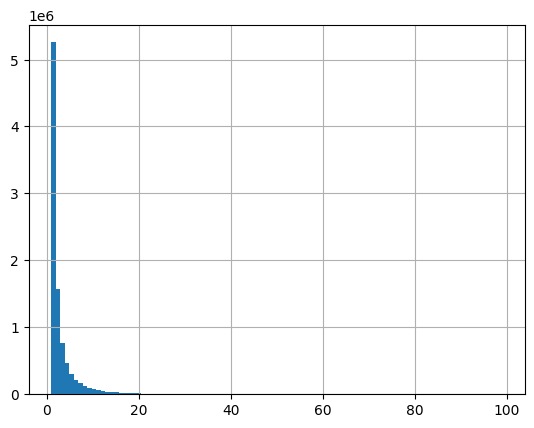

In [9]:
data_merge_group.n_sold.hist(bins=100)

In [10]:
# группировка по user_id и сортировка по кол-ву покупок
popularity = data_merge.groupby(['user_id'])['order_id'].count().reset_index()
popularity.rename(columns={'order_id': 'n_buy_full'}, inplace=True)
data_user_group = popularity.sort_values('n_buy_full', ascending=False)
print(data_user_group.shape)
data_user_group.head()

(100000, 2)


,user_id,n_buy_full
97601,201268,3671
63170,129928,3638
79663,164055,3061
85550,176478,2921
88401,182401,2907


In [11]:
data_user_group[data_user_group.n_buy_full < 100].shape

(22613, 2)

In [12]:
# группировка по product_id и сортировка по кол-ву покупок
popularity = data_merge.groupby(['product_id'])['order_id'].count().reset_index()
popularity.rename(columns={'order_id': 'n_sold_full'}, inplace=True)
data_product_group = popularity.sort_values('n_sold_full', ascending=False)
print(data_product_group.shape)
data_product_group.head()

(49465, 2)


,product_id,n_sold_full
24752,24852,391170
13119,13176,321553
21052,21137,226279
21814,21903,199961
47001,47209,183702


In [13]:
data_product_group[data_product_group.n_sold_full < 100].shape

(31643, 2)

In [14]:
data_merge_group.shape

(9459065, 3)

In [15]:
data_merge_group = data_merge_group.merge(data_product_group, left_on='product_id', right_on='product_id')
print(data_merge_group.shape)
data_merge_group.head()

(9459065, 4)


,user_id,product_id,n_sold,n_sold_full
0,41356,6583,99,697
1,175658,6583,79,697
2,50679,6583,56,697
3,100330,6583,40,697
4,197799,6583,27,697


In [16]:
data_merge_group = data_merge_group.merge(data_user_group, left_on='user_id', right_on='user_id')
print(data_merge_group.shape)
data_merge_group.head()

(9459065, 5)


,user_id,product_id,n_sold,n_sold_full,n_buy_full
0,41356,6583,99,697,1554
1,41356,14366,99,1473,1554
2,41356,38652,99,598,1554
3,41356,29671,98,527,1554
4,41356,28204,3,74184,1554


# Коллаборативная фильтрация

## формирование обучающих данных

т.к. данных очень много берем пары (user_id - product_id), где куплено больше n_delete раза, в остальных случаях присвиваем продукту id = 0

это поможет с Холодным стартом

In [17]:
n_delete = 3
data_merge_group.shape, data_merge_group[data_merge_group.n_sold <= n_delete].shape

((9459065, 5), (7602358, 5))

In [18]:
data_merge_group_new_1 = data_merge_group.copy()
data_merge_group_new_1.tail()

,user_id,product_id,n_sold,n_sold_full,n_buy_full
9459060,66955,25059,1,223,18
9459061,66955,2944,11,72,18
9459062,66955,48422,4,16,18
9459063,66955,4026,2,10,18
9459064,20121,17426,10,478,10


In [19]:
data_merge_group_new_1.user_id.nunique(), data_merge_group_new_1.product_id.nunique()

(100000, 49465)

In [20]:
data_merge_group_new_1.product_id.loc[data_merge_group_new_1[data_merge_group_new_1.n_sold <= n_delete].index] = 0
data_merge_group_new_1.tail()

,user_id,product_id,n_sold,n_sold_full,n_buy_full
9459060,66955,0,1,223,18
9459061,66955,2944,11,72,18
9459062,66955,48422,4,16,18
9459063,66955,0,2,10,18
9459064,20121,17426,10,478,10


In [21]:
data_merge_group_new_1.head()

,user_id,product_id,n_sold,n_sold_full,n_buy_full
0,41356,6583,99,697,1554
1,41356,14366,99,1473,1554
2,41356,38652,99,598,1554
3,41356,29671,98,527,1554
4,41356,0,3,74184,1554


In [22]:
data_merge_group_new_1.user_id.nunique(), data_merge_group_new_1.product_id.nunique()

(100000, 34429)

## coo_matrix

In [23]:
from scipy.sparse import csr_matrix, coo_matrix

In [24]:
users_inv_mapping = dict(enumerate(data_merge_group_new_1['user_id'].unique()))
users_mapping = {v: k for k, v in users_inv_mapping.items()}
len(users_mapping)

100000

In [25]:
items_inv_mapping = dict(enumerate(data_merge_group_new_1['product_id'].unique()))
items_mapping = {v: k for k, v in items_inv_mapping.items()}
len(items_mapping)

34429

In [26]:
row = data_merge_group_new_1['user_id'].map(users_mapping.get)
col = data_merge_group_new_1['product_id'].map(items_mapping.get)

In [27]:
data = np.ones(data_merge_group_new_1.shape[0])
data =  data_merge_group_new_1.n_sold.tolist() # на основе кол-ва продаж user-product
data =  data_merge_group_new_1.n_sold_full.tolist() # на основе общих кол-ва продаж
coo = coo_matrix((data, (row, col)),)
sparse_user_item = coo.tocsr()
sparse_user_item

<100000x34429 sparse matrix of type '<class 'numpy.int64'>'
	with 1956581 stored elements in Compressed Sparse Row format>

### pivot_table

In [ ]:
# user_item_matrix = pd.pivot_table(data_merge_group_new_1,
#                                   index='user_id', columns='product_id',
#                                   values='n_sold',
#                                   aggfunc='count',
#                                   fill_value=0
#                                  )

In [ ]:
# user_item_matrix[6583][20055:20065]

In [ ]:
# user_item_matrix.columns

In [ ]:
# user_item_matrix.head()

In [ ]:
# user_item_matrix.sum().sum() / (user_item_matrix.shape[0] * user_item_matrix.shape[1]) * 100

In [ ]:
# user_item_matrix = user_item_matrix.astype(float)
# user_item_matrix.head(3)

In [ ]:
# userids = user_item_matrix.index.values
# itemids = user_item_matrix.columns.values

# matrix_userids = np.arange(len(userids))
# matrix_itemids = np.arange(len(itemids))

# id_to_itemid = dict(zip(matrix_itemids, itemids))
# id_to_userid = dict(zip(matrix_userids, userids))

# itemid_to_id = dict(zip(itemids, matrix_itemids))
# userid_to_id = dict(zip(userids, matrix_userids))

In [ ]:
# userids[-10:]

## обучение

In [28]:
pip install implicit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 27.9 MB/s eta 0:00:00


In [29]:
from implicit.nearest_neighbours import ItemItemRecommender, CosineRecommender, TFIDFRecommender, BM25Recommender
from implicit.als import AlternatingLeastSquares

In [30]:
K = 10 # кол-во предсказаний

In [31]:
# model = ItemItemRecommender(K=K)

# model.fit(sparse_user_item.T,
#           show_progress=True)

In [32]:
factors=500
iterations=3
regularization=0.01
show_progress=True
model = AlternatingLeastSquares(
    factors=factors,
    iterations=iterations,
    regularization=regularization,
    num_threads=4,
    random_state=42
  )
model.fit(sparse_user_item,
          show_progress=show_progress)

/usr/local/lib/python3.10/dist-packages/implicit/cpu/als.py:95: RuntimeWarning: OpenBLAS is configured to use 2 threads. It is highly recommended to disable its internal threadpool by setting the environment variable 'OPENBLAS_NUM_THREADS=1' or by calling 'threadpoolctl.threadpool_limits(1, "blas")'. Having OpenBLAS use a threadpool can lead to severe performance issues here.
  check_blas_config()


  0%|          | 0/3 [00:00<?, ?it/s]

In [33]:
recs = model.recommend(userid=0,
                        user_items=sparse_user_item,
                        N=K,
                        filter_already_liked_items=False,
                        filter_items=[items_mapping[0]],
                        # recalculate_user=True
                       )
recs

(array([1549, 2359, 1785, 1085, 3107,  569, 4193,  304, 1494, 8820],
       dtype=int32),
 array([1.1136518, 1.100764 , 1.0871744, 1.0805019, 1.0755126, 1.0753584,
        1.0729494, 1.072932 , 1.0723463, 1.0684706], dtype=float32))

In [34]:
users_inv_mapping[44]

79607

In [ ]:
# items_inv_mapping

In [ ]:
items_mapping[0]

34428

## инференс

In [35]:
res = []
for userid in tqdm(users_mapping.values()):
  recs = model.recommend(userid=userid,
                        user_items=sparse_user_item,
                        N=K,
                        filter_already_liked_items=False,
                        filter_items=[items_mapping[0]],
                        # recalculate_user=True
                         )
  res.append(recs[0])

100%|██████████| 100000/100000 [09:28<00:00, 175.85it/s]


In [36]:
res[0]

array([1549, 2359, 1785, 1085, 3107,  569, 4193,  304, 1494, 8820],
      dtype=int32)

In [37]:
res_ids = [[items_inv_mapping[item_id] for item_id in res_] for res_ in res]
user_id = users_mapping.keys()
product_id = [' '.join(map(str, res_)) for res_ in res_ids]
data_res = pd.DataFrame({'user_id': user_id, 'product_id':product_id})
data_res.to_csv('sample_submission.csv', index=False)

In [38]:
data_res = pd.read_csv('sample_submission.csv')
data_res.head()

,user_id,product_id
0,41356,5640 27247 33037 33575 42139 39411 248 25767 7...
1,175658,49095 45774 12440 47258 37208 7014 35223 29474...
2,50679,13083 20580 31338 15399 39190 25824 40198 8490...
3,100330,26351 37417 41793 48210 6297 48335 25623 24518...
4,197799,25824 12099 14651 18288 26384 14233 20738 1090...


In [ ]:
data_merge_group.head(20)

,user_id,product_id,n_sold
1886836,41356,6583,99
1886854,41356,14366,99
1886893,41356,38652,99
1886878,41356,29671,98
818020,17997,4210,98
6515535,141736,25133,98
4774417,103593,28204,98
4597563,99707,24852,97
5573764,120897,12013,97
4599419,99753,27845,96


# LightFM

In [17]:
pip install lightfm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.4/316.4 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lightfm: filename=lightfm-1.17-cp310-cp310-linux_x86_64.whl size=808333 sha256=e9139f542892e48cf70359ccbe25b10acc8a388de626afa2b3abbf252ca5ca39
  Stored in directory: /root/.cache/pip/wheels/4f/9b/7e/0b256f2168511d8fa4dae4fae0200fdbd729eb424a912ad636
Successfully built lightfm


In [18]:
from lightfm.data import Dataset
from lightfm import LightFM

## формирование признаков

In [19]:
data_products = data_products.merge(data_product_group, left_on='product_id', right_on='product_id', how='outer')
print(data_products.shape)
data_products.head()

(49688, 7)


,product_id,product_name,aisle_id,department_id,aisle,department,n_sold_full
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,1549.0
1,2,All-Seasons Salt,104,13,spices seasonings,pantry,80.0
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages,242.0
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen,215.0
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry,11.0


In [20]:
data_products.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'aisle',
       'department', 'n_sold_full'],
      dtype='object')

In [21]:
data_transactions.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered'],
      dtype='object')

In [22]:
data_users = data_transactions.groupby(['user_id'])['order_dow',	'order_hour_of_day'].median().reset_index()
print(data_users.shape)
data_users.head()

<ipython-input-22-7b954e2615e9>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_users = data_transactions.groupby(['user_id'])['order_dow',	'order_hour_of_day'].median().reset_index()


(100000, 3)


,user_id,order_dow,order_hour_of_day
0,1,3.0,9.0
1,2,2.0,10.0
2,3,0.0,16.0
3,7,1.0,13.0
4,13,6.0,14.0


In [23]:
data_users = data_users.merge(data_user_group, left_on='user_id', right_on='user_id', how='outer')
print(data_users.shape)
data_users.head()

(100000, 4)


,user_id,order_dow,order_hour_of_day,n_buy_full
0,1,3.0,9.0,59
1,2,2.0,10.0,195
2,3,0.0,16.0,82
3,7,1.0,13.0,206
4,13,6.0,14.0,81


In [24]:
data_users.columns

Index(['user_id', 'order_dow', 'order_hour_of_day', 'n_buy_full'], dtype='object')

In [25]:
def generate_feature_list(dataframe, features_name):
    features = dataframe[features_name].apply(
        lambda x: ','.join(x.map(str)), axis=1)
    features = features.str.split(',')
    features = features.apply(pd.Series).stack().reset_index(drop=True)
    return features

In [26]:
products_features = ['product_name',	'aisle',	'department'] # , 'n_sold_full'
products_feature_list = generate_feature_list(
    data_products,
    products_features
    )

In [27]:
products_feature_list

0         Chocolate Sandwich Cookies
1                      cookies cakes
2                             snacks
3                   All-Seasons Salt
4                  spices seasonings
                     ...            
153944                 cat food care
153945                          pets
153946        Fresh Foaming Cleanser
153947                   facial care
153948                 personal care
Length: 153949, dtype: object

In [28]:
users_features = ['order_dow',	'order_hour_of_day'] # , 'n_buy_full'
users_feature_list = generate_feature_list(
    data_users,
    users_features)

In [29]:
users_feature_list

0          3.0
1          9.0
2          2.0
3         10.0
4          0.0
          ... 
199995    12.0
199996     2.0
199997    14.0
199998     3.0
199999    12.0
Length: 200000, dtype: object

In [30]:
def create_features(dataframe, features_name, id_col_name):
    features = dataframe[features_name].apply(
        lambda x: ','.join(x.map(str)), axis=1)
    features = features.str.split(',')
    features = list(zip(dataframe[id_col_name], features))
    return features

In [31]:
# creating features for feeding into lightfm
data_products['products_features'] = create_features(
    data_products,
    products_features,
    'product_id')

data_users['user_features'] = create_features(
    data_users,
    users_features,
    'user_id')

In [ ]:
# calculate our weight value
data_merge_group_new_2 = data_merge_group.copy()
data_merge_group_new_2['total_weights'] = (data_merge_group_new_2['n_sold']) / (
    data_merge_group_new_2['n_sold'].max())

In [32]:
# calculate our weight value # ПОПРОБОВАТЬ ТАК и без весов вообще
data_merge_group_new_2 = data_merge_group.copy()
data_merge_group_new_2['total_weights'] = 1 / (
    data_merge_group_new_2['n_sold'])

In [ ]:
# calculate our weight value
data_merge_group_new_2 = data_merge_group.copy()
data_merge_group_new_2['total_weights'] = (data_merge_group_new_2['n_sold_full']) / (
    data_merge_group_new_2['n_sold_full'].max())

In [33]:
dataset = Dataset()
dataset.fit(
    set(data_users['user_id']),
    set(data_products['product_id']),
    item_features=products_feature_list,
    user_features=users_feature_list)

In [34]:
len(set(data_products['product_id']))

49688

In [35]:
list(set(data_products['product_id']))[-5:]

[49684, 49685, 49686, 49687, 49688]

In [36]:
lightfm_mapping = dataset.mapping()
lightfm_mapping = {
    'users_mapping': lightfm_mapping[0],
    # 'user_features_mapping': lightfm_mapping[1],
    'items_mapping': lightfm_mapping[2],
    # 'item_features_mapping': lightfm_mapping[3],
}
lightfm_mapping['users_inv_mapping'] = {v: k for k, v in lightfm_mapping['users_mapping'].items()}
lightfm_mapping['items_inv_mapping'] = {v: k for k, v in lightfm_mapping['items_mapping'].items()}

In [53]:
# без учета весов
data_merge_group_new_2['user_product_id_tuple'] = list(zip(
    data_merge_group_new_2.user_id,
    data_merge_group_new_2.product_id))
data_merge_group_new_2.head()

,user_id,product_id,n_sold,n_sold_full,n_buy_full,total_weights,user_product_id_tuple
0,41356,6583,99,697,1554,0.010101,"(41356, 6583)"
1,41356,14366,99,1473,1554,0.010101,"(41356, 14366)"
2,41356,38652,99,598,1554,0.010101,"(41356, 38652)"
3,41356,29671,98,527,1554,0.010204,"(41356, 29671)"
4,41356,28204,3,74184,1554,0.333333,"(41356, 28204)"


In [37]:
# с учетом весов
data_merge_group_new_2['user_product_id_tuple'] = list(zip(
    data_merge_group_new_2.user_id,
    data_merge_group_new_2.product_id,
    data_merge_group_new_2.total_weights))
data_merge_group_new_2.head()

,user_id,product_id,n_sold,n_sold_full,n_buy_full,total_weights,user_product_id_tuple
0,41356,6583,99,697,1554,0.010101,"(41356, 6583, 0.010101010101010102)"
1,41356,14366,99,1473,1554,0.010101,"(41356, 14366, 0.010101010101010102)"
2,41356,38652,99,598,1554,0.010101,"(41356, 38652, 0.010101010101010102)"
3,41356,29671,98,527,1554,0.010204,"(41356, 29671, 0.01020408163265306)"
4,41356,28204,3,74184,1554,0.333333,"(41356, 28204, 0.3333333333333333)"


In [54]:
data_merge_group_new_2.tail()

,user_id,product_id,n_sold,n_sold_full,n_buy_full,total_weights,user_product_id_tuple
9459060,66955,25059,1,223,18,1.000000,"(66955, 25059)"
9459061,66955,2944,11,72,18,0.090909,"(66955, 2944)"
9459062,66955,48422,4,16,18,0.250000,"(66955, 48422)"
9459063,66955,4026,2,10,18,0.500000,"(66955, 4026)"
9459064,20121,17426,10,478,10,0.100000,"(20121, 17426)"


In [55]:
interactions, weights = dataset.build_interactions(
    data_merge_group_new_2['user_product_id_tuple'])
interactions, weights

(<100000x49688 sparse matrix of type '<class 'numpy.int32'>'
 	with 9459065 stored elements in COOrdinate format>,
 <100000x49688 sparse matrix of type '<class 'numpy.float32'>'
 	with 9459065 stored elements in COOrdinate format>)

In [56]:
user_features = dataset.build_user_features(
    data_users['user_features'])

products_features = dataset.build_item_features(
    data_products['products_features'])
user_features.shape, products_features.shape

((100000, 100046), (49688, 101108))

## обучение

In [57]:
K = 10 # кол-во предсказаний

In [58]:
model = LightFM(
    no_components=32,
    learning_rate=0.05,
    loss='warp',
    random_state=42
    )

In [59]:
model.fit(
    interactions,
    item_features=products_features,
    user_features=user_features,
    sample_weight=weights,
    epochs=10,
    num_threads=4,
    verbose=True,
)

Epoch: 100%|██████████| 10/10 [10:12<00:00, 61.25s/it]


In [60]:
item_ids=list(lightfm_mapping['items_mapping'].values())
scores = model.predict(
        user_ids=41356,
        item_ids=item_ids,
        item_features=products_features,
        user_features=user_features,
          num_threads=4)
scores

array([-172.03615, -175.09937, -173.97249, ..., -174.90793, -176.96887,
       -174.63783], dtype=float32)

In [61]:
# %%time
ids = np.argpartition(scores, -np.arange(K))[-K:][::-1]
res_ids = [lightfm_mapping['items_inv_mapping'][ids_] for ids_ in ids]
res_ids

[24852, 13176, 21137, 16797, 28204, 47626, 39275, 26604, 26209, 43352]

In [62]:
ids

array([24851, 13175, 21136, 16796, 28203, 47625, 39274, 26603, 26208,
       43351])

## инференс

In [63]:
import multiprocessing
multiprocessing.cpu_count()

2

In [ ]:
res = []
user_ids = lightfm_mapping['users_mapping'].values()
for user_id in tqdm(user_ids):
  scores = model.predict(
          user_ids=user_id,
          item_ids=item_ids,
          item_features=products_features,
          user_features=user_features,
          num_threads=4)
  ids = np.argpartition(scores, -np.arange(K))[-K:][::-1]
  res_ids = [lightfm_mapping['items_inv_mapping'][ids_] for ids_ in ids]
  product_id = ' '.join(map(str, res_ids))
  res.append(product_id)

  5%|▌         | 5303/100000 [01:43<27:28, 57.46it/s]

In [49]:
res[0]

'13176 24852 21137 43352 16797 26604 26209 47626 28204 39275'

In [50]:
product_id = res
user_id = lightfm_mapping['users_mapping'].keys()
data_res = pd.DataFrame({'user_id': user_id, 'product_id': product_id})
data_res.to_csv('sample_submission.csv', index=False)

In [51]:
data_res = pd.read_csv('sample_submission.csv')
data_res.head()

,user_id,product_id
0,1,13176 24852 21137 43352 16797 26604 26209 4762...
1,2,21137 9076 24852 13176 44632 39275 30489 26209...
2,3,24852 21137 26209 47626 13176 47209 47766 2190...
3,7,24852 21137 26209 47626 13176 21903 47209 3927...
4,13,26209 21137 24964 45007 4605 47626 21903 24852...


In [ ]:
data_product_group.head(10)

,product_id,n_sold_full
24752,24852,391170
13119,13176,321553
21052,21137,226279
21814,21903,199961
47001,47209,183702
47555,47766,141632
47417,47626,122080
27728,27845,118954
27849,27966,118073
26099,26209,115506


In [ ]:
data_merge_group.head(20)

,user_id,product_id,n_sold,n_sold_full,n_buy_full
0,41356,6583,99,697,1554
1,41356,14366,99,1473,1554
2,41356,38652,99,598,1554
3,41356,29671,98,527,1554
4,41356,28204,3,74184,1554
5,41356,24852,52,391170,1554
6,41356,38689,82,30761,1554
7,41356,11187,93,892,1554
8,41356,13176,36,321553,1554
9,41356,44632,5,62563,1554


# Результаты

In [ ]:
ItemItemRecommender

csr

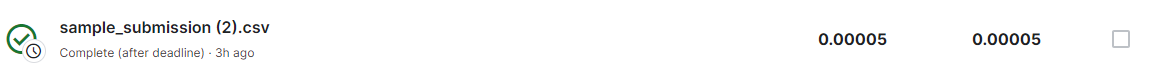

## Коллаборативная фильтрация

In [ ]:
AlternatingLeastSquares

factors=200
iterations=15
regularization=0.01

coo

ничего не удаляется

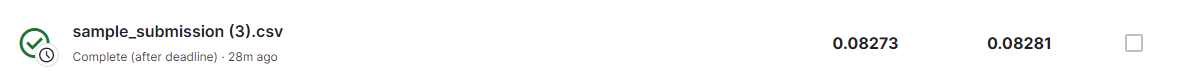

In [ ]:
AlternatingLeastSquares

factors=500
iterations=3
regularization=0.01
coo

удаляются везде где 1 (остается в предиктах 0)

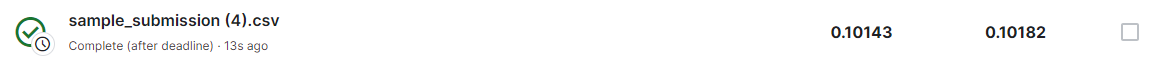

In [ ]:
AlternatingLeastSquares

factors=500
iterations=3
regularization=0.01
coo

удаляются везде где 2 (остается в предиктах 0)

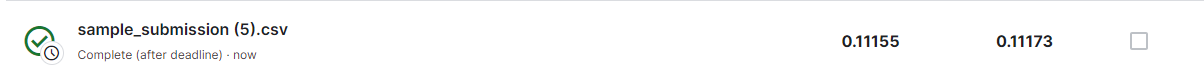

In [ ]:
AlternatingLeastSquares

factors=500
iterations=3
regularization=0.01
coo

удаляются везде где 2 (не остается в предиктах 0)

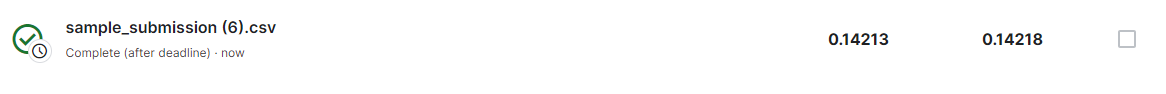

In [ ]:
AlternatingLeastSquares

factors=500
iterations=3
regularization=0.01
coo

удаляются везде где 3 (не остается в предиктах 0)

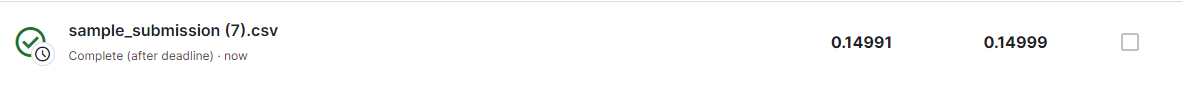

In [ ]:
AlternatingLeastSquares

factors=500
iterations=10
regularization=0.01
coo

удаляются везде где 3 (не остается в предиктах 0)

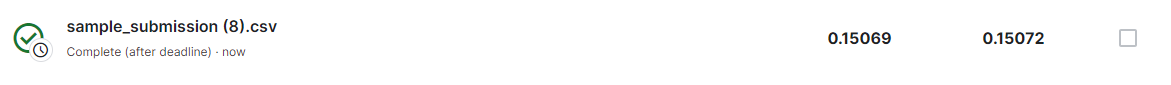

In [ ]:
AlternatingLeastSquares

factors=500
iterations=3
regularization=0.01
coo (на основе кол-ва продаж)

удаляются везде где 3 (не остается в предиктах 0)

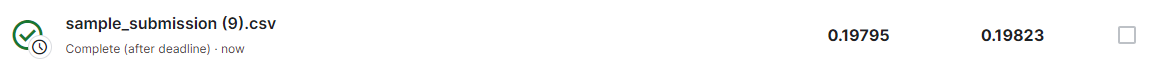

In [ ]:
AlternatingLeastSquares

factors=500
iterations=10
regularization=0.01
coo (на основе кол-ва продаж)

удаляются везде где 3 (не остается в предиктах 0)

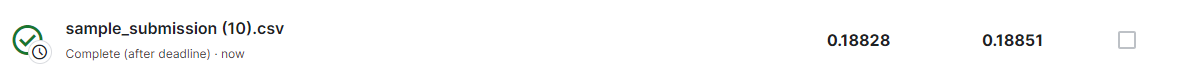

In [ ]:
AlternatingLeastSquares

factors=500
iterations=3
regularization=0.01
coo (на основе общего кол-ва продаж)

удаляются везде где 3 (не остается в предиктах 0)

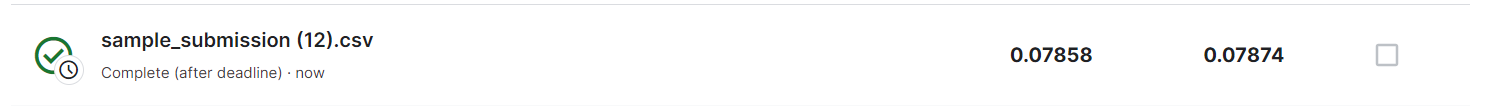

In [ ]:
LightFM

no_components=32,
learning_rate=0.05,
loss='warp',
random_state=42

3 эпохи

coo (на основе кол-ва продаж) ((data_merge_group_new_2['n_sold']) / (
    data_merge_group_new_2['n_sold'].max()))

ничего не удаляется

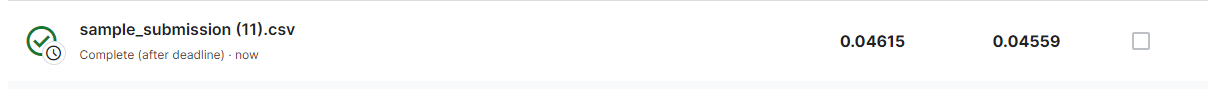

## LightFM

In [ ]:
LightFM

no_components=32,
learning_rate=0.05,
loss='warp',
random_state=42

3 эпохи

coo (на основе кол-ва продаж) (1 / (
    data_merge_group_new_2['n_sold']))

ничего не удаляется

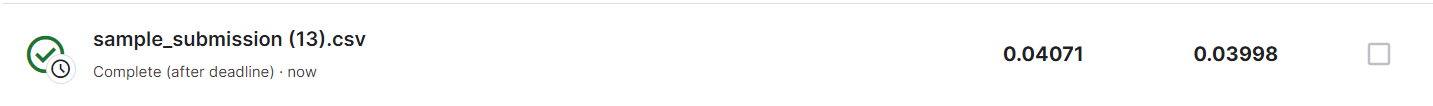

In [ ]:
LightFM

no_components=32,
learning_rate=0.05,
loss='warp',
random_state=42

3 эпохи

coo

ничего не удаляется

In [ ]:
LightFM

no_components=32,
learning_rate=0.05,
loss='warp',
random_state=42

3 эпохи

coo ?

удаляются везде где 3 (не остается в предиктах 0)